In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [138]:
data = pd.read_csv("C:\\Users\\dhruv\\Downloads\\Housing.csv")

In [139]:
dft = data.drop(columns=['furnishingstatus'])
col = dft.columns

In [140]:
scaler = StandardScaler() 

In [141]:
#
#CREATING BIN_MAP FUNCTION
#
def bin_map(var):
    i = 0
    while(i < 545):
        if(var[i] == 'yes'):
            var[i] = 1
        if(var[i] == 'no'):
            var[i] = 0
        i = i + 1

In [142]:
#
#MAPPING 'YES' AND 'NO' TO '1'S' AND '0'S'
#
bin_map(dft.mainroad)
bin_map(dft.guestroom)
bin_map(dft.basement)
bin_map(dft.hotwaterheating)
bin_map(dft.airconditioning)
bin_map(dft.prefarea)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10888\3636318678.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[i] = 1
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10888\3636318678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[i] = 0


In [143]:
dft = scaler.fit_transform(dft)

In [144]:
Y = scaler.fit_transform(np.array(data.price).reshape(545,1))
Wye = pd.DataFrame(Y)

In [145]:
data = pd.DataFrame(dft,columns=col)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035


In [146]:
Wye = pd.DataFrame(np.array(data.price))


In [147]:
Ex = data.drop(columns=['price'])


In [148]:
train=data.sample(frac=0.8,random_state=1) 
test=data.drop(train.index)

In [149]:
y_train = pd.DataFrame(np.array(train.price))
x_train = train.drop(columns=['price'])

y_test = pd.DataFrame(np.array(test.price))
x_test = np.array(test.drop(columns=['price']))

In [150]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [151]:
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when

Text(0.5, 1.0, 'SVR')

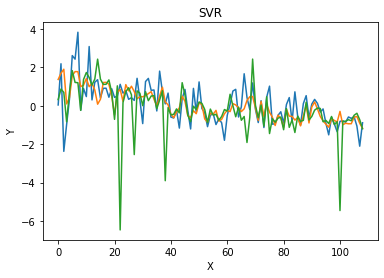

In [152]:
plt.plot(y_rbf)
plt.plot(y_lin)
plt.plot(y_poly)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVR')
